In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

data_dir = '../data'

/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.

In [2]:
df = pd.read_csv(data_dir + '/pd_speech_features.csv')
display(df)
print(df.shape)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


(756, 755)


In [3]:
# find all the columns which are full of zeros and remove them

zero_tol = 1e-5
zeros = (abs(df) <= zero_tol).all(axis=0)
zero_cols = [ii for ii, bb in enumerate(zeros) if bb]
print(zero_cols)
print(f"\n---- there are {len(zero_cols)} columns with all zeros ----\n")
print(df.iloc[:, zero_cols[0]], '\n')

df = df.drop(df.columns[zero_cols], axis=1)
display(df)

[538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572]

---- there are 35 columns with all zeros ----

0     -2.890000e-21
1     -1.770000e-21
2      9.440000e-22
3     -4.480000e-21
4     -1.800000e-21
           ...     
751   -1.700000e-20
752    3.220000e-21
753   -2.950000e-22
754    1.770000e-21
755    1.460000e-20
Name: tqwt_meanValue_dec_1, Length: 756, dtype: float64 



,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [4]:
# now average by 'id'

df_avg = pd.concat([df[df['id'] == 0].mean(), df[df['id'] == 1].mean()], axis=1).T
for ii in range(2, int(len(df)/3)):
    df_avg.loc[len(df_avg)] = df[df['id'] == ii].mean()
df_avg['id'] = df_avg['id'].astype(int)
df_avg['gender'] = df_avg['gender'].astype(int)
df_avg['class'] = df_avg['class'].astype(int)
df = df_avg
display(df)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.823387,0.696370,0.567250,235.333333,234.333333,0.008220,0.000073,0.001963,...,1.561733,2.862000,12.293333,9.717500,9.055300,6.259100,4.021533,4.164333,22.961700,1
1,1,0,0.415637,0.793993,0.592453,213.333333,211.000000,0.008884,0.001849,0.005790,...,4.918567,4.827133,6.117633,8.599667,5.737233,7.933133,5.490533,4.941833,4.467233,1
2,2,1,0.801973,0.619967,0.520563,319.333333,318.333333,0.006041,0.000104,0.002217,...,41.129400,31.201933,14.584467,5.446800,3.462000,4.772067,9.176633,11.848100,5.552367,1
3,3,0,0.828707,0.626097,0.537183,493.000000,492.000000,0.003913,0.000042,0.000757,...,1.677633,1.908400,2.842167,3.493867,3.282433,3.085267,3.184433,4.032933,22.773633,1
4,4,0,0.831287,0.779397,0.726717,362.666667,361.666667,0.005622,0.002023,0.003593,...,4.104600,4.285233,2.953200,2.799933,2.645100,2.811367,7.268333,13.338833,63.766900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,0,0.751703,0.651830,0.586847,326.000000,324.666667,0.005911,0.000251,0.003193,...,19.298667,15.072200,13.479700,14.877933,22.053767,20.532267,17.000400,16.132633,40.472133,1
248,248,1,0.611750,0.688327,0.452343,356.666667,355.333333,0.005410,0.000964,0.002467,...,4.448533,3.180933,2.880233,2.805067,2.872667,3.071367,3.957200,4.962500,2.890800,1
249,249,1,0.819857,0.788800,0.373520,339.666667,338.666667,0.005684,0.000042,0.000800,...,90.482767,65.641367,29.098533,8.966500,6.558600,11.885633,16.674300,14.303767,11.819967,1
250,250,0,0.600530,0.569010,0.411987,402.333333,401.000000,0.004775,0.000103,0.000983,...,2.674667,2.714200,2.706000,2.637700,3.816233,3.421233,4.149200,5.726533,13.467700,0


In [5]:
print(f"there are {list(df['gender']).count(0)} women and {list(df['gender']).count(1)} men")
print(f"there are {list(df['class']).count(0)} HC and {list(df['class']).count(1)} PD")

there are 122 women and 130 men
there are 64 HC and 188 PD


In [6]:
features = list(df.columns)
features.remove('id')
features.remove('class')

In [7]:
df_features = df[features]
pearson_all = df_features.corr(method='pearson')
display(pearson_all)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
gender,1.000000,0.014374,0.104643,0.182123,-0.509785,-0.509089,0.495303,-0.150848,0.123586,0.163135,...,-0.322218,-0.117443,0.000265,0.084258,0.104299,0.109056,0.131868,0.163985,0.135109,0.121971
PPE,0.014374,1.000000,-0.113344,-0.474091,0.213316,0.217252,-0.217844,-0.485176,-0.436440,-0.414618,...,0.168194,0.230616,0.218607,0.134644,0.095019,0.066630,0.059702,0.081546,0.077205,0.075091
DFA,0.104643,-0.113344,1.000000,0.171102,-0.296987,-0.297013,0.269871,0.107424,0.238228,0.230124,...,-0.229576,-0.171115,-0.133140,-0.064156,-0.072142,-0.067312,-0.030422,0.066398,0.096407,0.144736
RPDE,0.182123,-0.474091,0.171102,1.000000,-0.556395,-0.560082,0.546524,0.376566,0.663059,0.662711,...,-0.393438,-0.385035,-0.348892,-0.177054,-0.110922,-0.113132,-0.109201,-0.039366,-0.019258,0.037335
numPulses,-0.509785,0.213316,-0.296987,-0.556395,1.000000,0.999951,-0.916333,-0.171132,-0.455617,-0.549637,...,0.470357,0.307047,0.200102,0.035223,-0.046735,-0.062827,-0.079303,-0.101547,-0.095644,-0.080576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_32,0.109056,0.066630,-0.067312,-0.113132,-0.062827,-0.062682,0.059652,-0.135403,-0.002306,0.015359,...,0.127106,0.275669,0.518070,0.783403,0.935217,1.000000,0.957468,0.726402,0.580303,0.445941
tqwt_kurtosisValue_dec_33,0.131868,0.059702,-0.030422,-0.109201,-0.079303,-0.079230,0.064247,-0.124216,0.012375,0.026961,...,0.056259,0.218401,0.473974,0.726913,0.862847,0.957468,1.000000,0.812157,0.668839,0.520094
tqwt_kurtosisValue_dec_34,0.163985,0.081546,0.066398,-0.039366,-0.101547,-0.101407,0.066567,-0.109313,0.022507,0.022387,...,-0.050623,0.077339,0.339706,0.595167,0.672313,0.726402,0.812157,1.000000,0.953832,0.801711
tqwt_kurtosisValue_dec_35,0.135109,0.077205,0.096407,-0.019258,-0.095644,-0.095368,0.048322,-0.128344,0.000409,-0.002025,...,-0.115293,-0.044380,0.200909,0.458675,0.528720,0.580303,0.668839,0.953832,1.000000,0.887037


Text(0.5, 1.0, 'Abs(all Pearson correlations)')

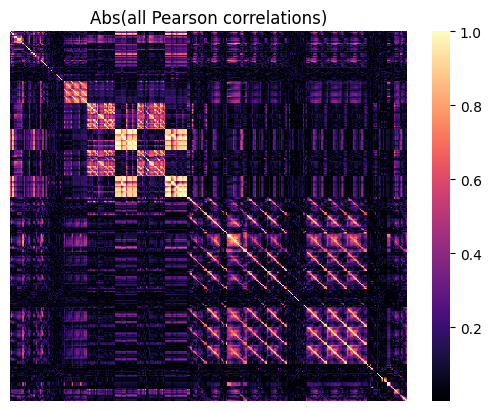

In [8]:
ax = sns.heatmap(pearson_all.abs(), cmap='magma', xticklabels=False, yticklabels=False)
ax.set_title("Abs(all Pearson correlations)")

In [9]:
# find all the features which correlate to each other, and drop them
# https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

high_corr_thresh = 0.95

# get the upper right triangle (not including diagonal)
upper_tri = pearson_all.where(np.triu(np.ones(pearson_all.shape), k=1).astype(bool))
display(upper_tri)

# find columns to drop
to_drop = [col for col in upper_tri.columns if any(abs(upper_tri[col]) > high_corr_thresh)]
print(to_drop)
print(f"\n---- number of features to drop due to high correlation = {len(to_drop)} ----\n")

# convert column names to indices and drop
to_drop_ind = [ii for ii in range(len(pearson_all.columns)) if pearson_all.columns[ii] in to_drop]
print(to_drop_ind)
print(f"\n---- number of features to drop due to high correlation = {len(to_drop_ind)} ----\n")
print(len(to_drop_ind)/df_features.shape[1])

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
gender,NaN,0.014374,0.104643,0.182123,-0.509785,-0.509089,0.495303,-0.150848,0.123586,0.163135,...,-0.322218,-0.117443,0.000265,0.084258,0.104299,0.109056,0.131868,0.163985,0.135109,0.121971
PPE,NaN,NaN,-0.113344,-0.474091,0.213316,0.217252,-0.217844,-0.485176,-0.436440,-0.414618,...,0.168194,0.230616,0.218607,0.134644,0.095019,0.066630,0.059702,0.081546,0.077205,0.075091
DFA,NaN,NaN,NaN,0.171102,-0.296987,-0.297013,0.269871,0.107424,0.238228,0.230124,...,-0.229576,-0.171115,-0.133140,-0.064156,-0.072142,-0.067312,-0.030422,0.066398,0.096407,0.144736
RPDE,NaN,NaN,NaN,NaN,-0.556395,-0.560082,0.546524,0.376566,0.663059,0.662711,...,-0.393438,-0.385035,-0.348892,-0.177054,-0.110922,-0.113132,-0.109201,-0.039366,-0.019258,0.037335
numPulses,NaN,NaN,NaN,NaN,NaN,0.999951,-0.916333,-0.171132,-0.455617,-0.549637,...,0.470357,0.307047,0.200102,0.035223,-0.046735,-0.062827,-0.079303,-0.101547,-0.095644,-0.080576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.957468,0.726402,0.580303,0.445941
tqwt_kurtosisValue_dec_33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.812157,0.668839,0.520094
tqwt_kurtosisValue_dec_34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.953832,0.801711
tqwt_kurtosisValue_dec_35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.887037


['numPeriodsPulses', 'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter', 'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'ddaShimmer', 'meanNoiseToHarmHarmonicity', 'meanIntensity', 'VFER_entropy', 'IMF_NSR_entropy', 'std_1st_delta_delta', 'std_2nd_delta_delta', 'std_3rd_delta_delta', 'std_4th_delta_delta', 'std_5th_delta_delta', 'std_6th_delta_delta', 'std_7th_delta_delta', 'std_8th_delta_delta', 'std_9th_delta_delta', 'std_10th_delta_delta', 'std_11th_delta_delta', 'std_12th_delta_delta', 'det_entropy_shannon_2_coef', 'det_entropy_log_2_coef', 'det_entropy_log_8_coef', 'det_entropy_log_9_coef', 'det_entropy_log_10_coef', 'det_TKEO_mean_1_coef', 'det_TKEO_mean_2_coef', 'det_TKEO_mean_3_coef', 'det_TKEO_mean_4_coef', 'det_TKEO_mean_5_coef', 'det_TKEO_mean_6_coef', 'det_TKEO_mean_7_coef', 'det_TKEO_mean_8_coef', 'det_TKEO_mean_9_coef', 'det_TKEO_mean_10_coef', 'det_TKEO_std_1_coef', 'det_TKEO_std_2_coef', 'det_TKEO_std_3_coef', 'det_TKEO_std_4_coef', 'det_TKEO_std_5_coef', 'det_TKEO_s

In [10]:
# remove highly correlated features and SAVE the df

orig_num_features = df.shape[1]
df = df.drop(df.columns[to_drop_ind], axis=1)

display(df)
print(df.shape)
print(orig_num_features - len(to_drop))

,id,gender,PPE,DFA,RPDE,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,ddpJitter,apq5Shimmer,...,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.823387,0.696370,0.567250,234.333333,0.008220,0.000073,0.001760,0.045560,...,1.591700,1.546500,1.561733,2.862000,12.293333,9.717500,6.259100,4.164333,22.961700,1
1,1,0,0.415637,0.793993,0.592453,211.000000,0.008884,0.001849,0.005473,0.036503,...,1.881900,7.049367,4.918567,4.827133,6.117633,8.599667,7.933133,4.941833,4.467233,1
2,2,1,0.801973,0.619967,0.520563,318.333333,0.006041,0.000104,0.000973,0.026073,...,1.590333,1.581967,41.129400,31.201933,14.584467,5.446800,4.772067,11.848100,5.552367,1
3,3,0,0.828707,0.626097,0.537183,492.000000,0.003913,0.000042,0.000260,0.027467,...,5.676767,2.382533,1.677633,1.908400,2.842167,3.493867,3.085267,4.032933,22.773633,1
4,4,0,0.831287,0.779397,0.726717,361.666667,0.005622,0.002023,0.003290,0.108363,...,3.614567,3.881267,4.104600,4.285233,2.953200,2.799933,2.811367,13.338833,63.766900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,0,0.751703,0.651830,0.586847,324.666667,0.005911,0.000251,0.002113,0.034777,...,1.552700,3.009767,19.298667,15.072200,13.479700,14.877933,20.532267,16.132633,40.472133,1
248,248,1,0.611750,0.688327,0.452343,355.333333,0.005410,0.000964,0.002120,0.061150,...,1.852067,1.893733,4.448533,3.180933,2.880233,2.805067,3.071367,4.962500,2.890800,1
249,249,1,0.819857,0.788800,0.373520,338.666667,0.005684,0.000042,0.000410,0.032463,...,1.635000,16.619433,90.482767,65.641367,29.098533,8.966500,11.885633,14.303767,11.819967,1
250,250,0,0.600530,0.569010,0.411987,401.000000,0.004775,0.000103,0.000360,0.016757,...,11.502200,11.243367,2.674667,2.714200,2.706000,2.637700,3.421233,5.726533,13.467700,0


(252, 433)
433


Text(0.5, 1.0, 'Abs(Pearson corr \\ highly corr)')

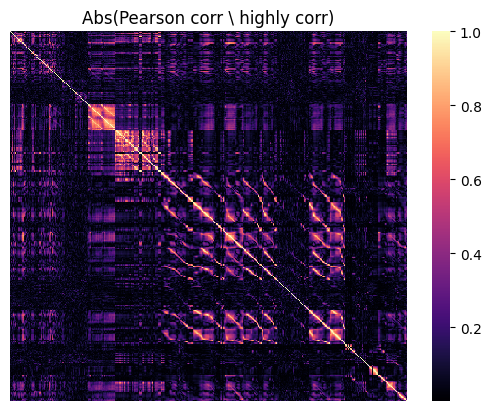

In [11]:
ax = sns.heatmap(df.corr(method='pearson').abs(), cmap='magma', xticklabels=False, yticklabels=False)
ax.set_title("Abs(Pearson corr \ highly corr)")

In [12]:
pearson = df.corr(method='pearson')['class']
print(pearson)
print(type(pearson))

id                          -0.111661
gender                       0.182713
PPE                         -0.103041
DFA                          0.322357
RPDE                         0.267733
                               ...   
tqwt_kurtosisValue_dec_31   -0.033668
tqwt_kurtosisValue_dec_33    0.146804
tqwt_kurtosisValue_dec_35    0.275216
tqwt_kurtosisValue_dec_36    0.325589
class                        1.000000
Name: class, Length: 433, dtype: float64
<class 'pandas.core.series.Series'>


In [13]:
# low_corr_cutoff = 0.003  # 80, 89, 84, 86 [log regr - accuracy, precision, recall, f1]
# low_corr_cutoff = 0.01   # 81, 90, 84, 87
low_corr_cutoff = 0.03   # 81, 89, 85, 87
# low_corr_cutoff = 0.1    # 82, 92, 83, 87 (slow)
# low_corr_cutoff = 0.2    # 82, 91, 83, 87 (slow)
# low_corr_cutoff = 0.25   # 78, 90, 79, 84 (slow)
# low_corr_cutoff = 0.3    # 75, 88, 78, 83

omit_these_features = pearson[abs(pearson) <= low_corr_cutoff].index
omit_these_features = list(omit_these_features)
# omit_these_features.remove('id')
print(omit_these_features, '\n')
print(len(omit_these_features), len(omit_these_features)/(df.shape[1] - 2))

['f4', 'mean_7th_delta', 'mean_8th_delta', 'mean_9th_delta', 'mean_10th_delta', 'mean_11th_delta', 'mean_12th_delta', 'mean_delta_delta_0th', 'mean_2nd_delta_delta', 'mean_3rd_delta_delta', 'mean_6th_delta_delta', 'mean_7th_delta_delta', 'mean_8th_delta_delta', 'std_MFCC_2nd_coef', 'Ed_1_coef', 'Ed_2_coef', 'Ed_4_coef', 'Ed_5_coef', 'Ed_6_coef', 'Ed_8_coef', 'det_entropy_shannon_5_coef', 'det_entropy_shannon_6_coef', 'det_entropy_shannon_7_coef', 'det_entropy_shannon_9_coef', 'det_entropy_shannon_10_coef', 'det_TKEO_std_10_coef', 'Ed2_3_coef', 'Ed2_6_coef', 'Ed2_8_coef', 'det_LT_entropy_shannon_5_coef', 'det_LT_entropy_shannon_8_coef', 'tqwt_energy_dec_4', 'tqwt_energy_dec_19', 'tqwt_energy_dec_23', 'tqwt_energy_dec_30', 'tqwt_entropy_shannon_dec_1', 'tqwt_entropy_shannon_dec_3', 'tqwt_entropy_shannon_dec_25', 'tqwt_entropy_shannon_dec_26', 'tqwt_entropy_shannon_dec_33', 'tqwt_entropy_log_dec_30', 'tqwt_TKEO_mean_dec_22', 'tqwt_TKEO_mean_dec_25', 'tqwt_TKEO_mean_dec_30', 'tqwt_TKEO_std

I will remove features which have a "(very) low" correlation with the class. A weak correlation is generally considered to be less than 0.3, but if I set corr_cutoff to 0.3 I lose 704 of the 753 features. So, through some trial and error, I set an appropriate corr_cutoff.

In [14]:
features = list(df.columns)
features.remove('id')
features.remove('class')

remaining_features = features.copy()
for ff in omit_these_features:
#     print(ff)
    remaining_features.remove(ff)
print(len(remaining_features))

361


In [16]:
# reduce and SAVE the df

df = df[['id'] + remaining_features + ['class']]
display(df)
df.to_csv(data_dir + '/pd_speech_features_reduced.csv', index=None)

,id,gender,PPE,DFA,RPDE,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,ddpJitter,apq5Shimmer,...,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.823387,0.696370,0.567250,234.333333,0.008220,0.000073,0.001760,0.045560,...,1.591700,1.546500,1.561733,2.862000,12.293333,9.717500,6.259100,4.164333,22.961700,1
1,1,0,0.415637,0.793993,0.592453,211.000000,0.008884,0.001849,0.005473,0.036503,...,1.881900,7.049367,4.918567,4.827133,6.117633,8.599667,7.933133,4.941833,4.467233,1
2,2,1,0.801973,0.619967,0.520563,318.333333,0.006041,0.000104,0.000973,0.026073,...,1.590333,1.581967,41.129400,31.201933,14.584467,5.446800,4.772067,11.848100,5.552367,1
3,3,0,0.828707,0.626097,0.537183,492.000000,0.003913,0.000042,0.000260,0.027467,...,5.676767,2.382533,1.677633,1.908400,2.842167,3.493867,3.085267,4.032933,22.773633,1
4,4,0,0.831287,0.779397,0.726717,361.666667,0.005622,0.002023,0.003290,0.108363,...,3.614567,3.881267,4.104600,4.285233,2.953200,2.799933,2.811367,13.338833,63.766900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,0,0.751703,0.651830,0.586847,324.666667,0.005911,0.000251,0.002113,0.034777,...,1.552700,3.009767,19.298667,15.072200,13.479700,14.877933,20.532267,16.132633,40.472133,1
248,248,1,0.611750,0.688327,0.452343,355.333333,0.005410,0.000964,0.002120,0.061150,...,1.852067,1.893733,4.448533,3.180933,2.880233,2.805067,3.071367,4.962500,2.890800,1
249,249,1,0.819857,0.788800,0.373520,338.666667,0.005684,0.000042,0.000410,0.032463,...,1.635000,16.619433,90.482767,65.641367,29.098533,8.966500,11.885633,14.303767,11.819967,1
250,250,0,0.600530,0.569010,0.411987,401.000000,0.004775,0.000103,0.000360,0.016757,...,11.502200,11.243367,2.674667,2.714200,2.706000,2.637700,3.421233,5.726533,13.467700,0


Text(0.5, 1.0, 'Abs(Pearson corr \\ highly corr \\ low-class corr)')

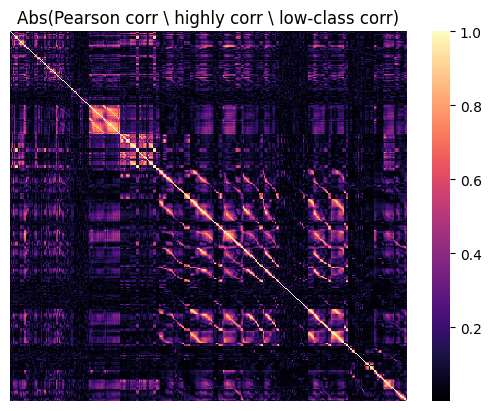

In [17]:
ax = sns.heatmap(df.corr(method='pearson').abs(), cmap='magma', xticklabels=False, yticklabels=False)
ax.set_title("Abs(Pearson corr \ highly corr \ low-class corr)")

I will now check the spearman correlation coefficient, which captures a sense of non-linear correlations, and then compare them to the pearson correlation coefficients.

In [18]:
spearman = df.corr(method='spearman')['class']
print(spearman)
print(type(spearman))

id                          -0.111661
gender                       0.182713
PPE                         -0.138480
DFA                          0.317689
RPDE                         0.253650
                               ...   
tqwt_kurtosisValue_dec_31    0.014913
tqwt_kurtosisValue_dec_33    0.193371
tqwt_kurtosisValue_dec_35    0.319193
tqwt_kurtosisValue_dec_36    0.350649
class                        1.000000
Name: class, Length: 363, dtype: float64
<class 'pandas.core.series.Series'>


In [19]:
high_corr_features = [ff for ff in remaining_features if abs(pearson[ff]) >= 0.3]
print(high_corr_features)
print(len(high_corr_features))

['DFA', 'numPeriodsPulses', 'f1', 'VFER_mean', 'VFER_entropy', 'mean_MFCC_2nd_coef', 'std_delta_log_energy', 'std_6th_delta', 'std_7th_delta', 'std_8th_delta', 'std_9th_delta', 'std_10th_delta', 'std_11th_delta', 'std_12th_delta', 'std_delta_delta_log_energy', 'std_12th_delta_delta', 'app_entropy_shannon_10_coef', 'app_TKEO_std_10_coef', 'tqwt_energy_dec_12', 'tqwt_energy_dec_13', 'tqwt_energy_dec_14', 'tqwt_energy_dec_15', 'tqwt_entropy_shannon_dec_10', 'tqwt_entropy_shannon_dec_11', 'tqwt_entropy_shannon_dec_12', 'tqwt_entropy_shannon_dec_13', 'tqwt_entropy_shannon_dec_14', 'tqwt_entropy_shannon_dec_15', 'tqwt_entropy_shannon_dec_16', 'tqwt_entropy_shannon_dec_17', 'tqwt_entropy_log_dec_11', 'tqwt_TKEO_mean_dec_10', 'tqwt_TKEO_mean_dec_12', 'tqwt_TKEO_mean_dec_15', 'tqwt_TKEO_std_dec_11', 'tqwt_TKEO_std_dec_15', 'tqwt_stdValue_dec_7', 'tqwt_stdValue_dec_16', 'tqwt_minValue_dec_10', 'tqwt_minValue_dec_11', 'tqwt_minValue_dec_12', 'tqwt_kurtosisValue_dec_26', 'tqwt_kurtosisValue_dec_27

In [20]:
print("feature,    pearson,    spearman")
print("--------------------------------")
for ff in high_corr_features:
    print(f"{ff},    {pearson[ff]},    {spearman[ff]}")

feature,    pearson,    spearman
--------------------------------
DFA,    0.3223567077234089,    0.31768927513782075
numPeriodsPulses,    -0.3026572483933705,    -0.2786536500993273
f1,    -0.3126104979523546,    -0.28811346885280076
VFER_mean,    -0.30391973654539445,    -0.25803637771549226
VFER_entropy,    -0.31253018289691104,    -0.2785890566593197
mean_MFCC_2nd_coef,    0.41470875543640223,    0.3812898622514645
std_delta_log_energy,    0.30082647502439325,    0.4437624154883721
std_6th_delta,    0.3629965228137053,    0.3759636392163559
std_7th_delta,    0.3668404877118853,    0.39238071812880343
std_8th_delta,    0.391307893989887,    0.4022810939615008
std_9th_delta,    0.3785866469482993,    0.39852145756933727
std_10th_delta,    0.3530127628322869,    0.3704495058411827
std_11th_delta,    0.3528957711273794,    0.3643089029929851
std_12th_delta,    0.3190747435281817,    0.3527166203144607
std_delta_delta_log_energy,    0.37022884665215816,    0.4498405786529603
std_12th_del

We see that the following features have a non-linear correlation with the class (diff > 0.05):
[insert].

And the following features are very linearily related to the class (diff < 0.005):
[insert].

============================= I will now perform a PCA to check things out =============================

In [21]:
class RunPCA():
    def __init__(self, X: np.ndarray, y: pd.Series) -> None:
        self.X = X
        self.y = y
    
    def scale_X(self) -> None:
        sc = StandardScaler()
        self.X = sc.fit_transform(self.X)
    
    def exec_PCA(self) -> None:
        self.pca = PCA()
        self.X = self.pca.fit_transform(self.X)
    
    def set_ev(self) -> None:
        self.explained_variance = self.pca.explained_variance_ratio_
        self.num_components = len(self.explained_variance)
        print(f"number of components = {self.num_components}")
#         print(f"explained_variance = {self.explained_variance}")
        
        sum_cev = 0
        self.cummulative_ev = []
        for ii in range(self.num_components):
            sum_cev += self.explained_variance[ii]
            self.cummulative_ev.append(sum_cev)
#         print(f"cummulative_ev = {self.cummulative_ev}")
    
    def plot_ev(self) -> None:
        plt.figure()
        plt.bar(range(1, self.num_components+1), self.explained_variance)
        plt.title('explained variance')
        plt.xlabel('component')
        plt.ylabel('percent explained')
        plt.show()
        plt.close()
    
    def plot_cev(self) -> None:
        plt.figure()
        plt.bar(range(1, self.num_components+1), self.cummulative_ev)
        plt.title('cummulative explained variance')
        plt.xlabel('component')
        plt.ylabel('percent explained')
        plt.show()
        plt.close()
    
    def plot_PCA(self) -> None:        
        plt.figure()
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y)
        plt.title('PC1 vs PC2')
        plt.xlabel(f"PC1 = {100*self.explained_variance[0]:.2f}%")
        plt.ylabel(f"PC2 = {100*self.explained_variance[1]:.2f}%")
        plt.colorbar()
        plt.show()
        plt.close()
        
        plt.figure()
        plt.scatter(self.X[:, 1], self.X[:, 2], c=self.y)
        plt.title('PC2 vs PC3')
        plt.xlabel(f"PC1 = {100*self.explained_variance[1]:.2f}%")
        plt.ylabel(f"PC2 = {100*self.explained_variance[2]:.2f}%")
        plt.colorbar()
        plt.show()
        plt.close()
    
    def run(self) -> None:
        self.scale_X()
        self.exec_PCA()
        self.set_ev()
        self.plot_ev()
        self.plot_cev()
        self.plot_PCA()

In [22]:
X = df[remaining_features].values
old_X = X.copy()
print(X)
y = df['class']

[[ 1.          0.82338667  0.69637    ...  6.2591      4.16433333
  22.9617    ]
 [ 0.          0.41563667  0.79399333 ...  7.93313333  4.94183333
   4.46723333]
 [ 1.          0.80197333  0.61996667 ...  4.77206667 11.8481
   5.55236667]
 ...
 [ 1.          0.81985667  0.7888     ... 11.88563333 14.30376667
  11.81996667]
 [ 0.          0.60053     0.56901    ...  3.42123333  5.72653333
  13.4677    ]
 [ 0.          0.84491667  0.74565333 ...  2.51466667  2.93646667
   3.9694    ]]


number of components = 252


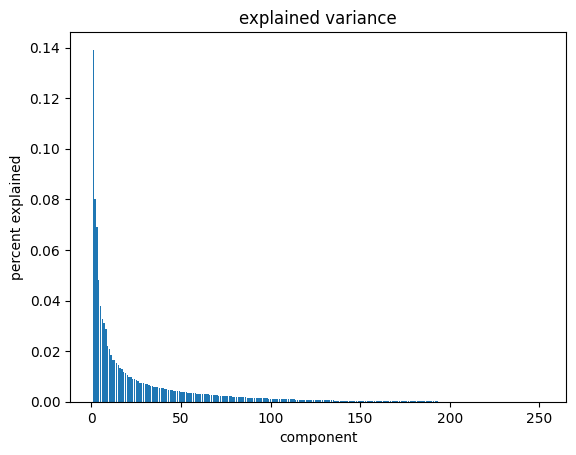

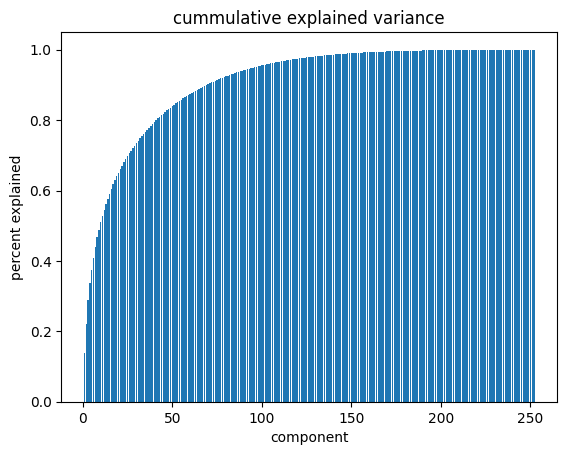

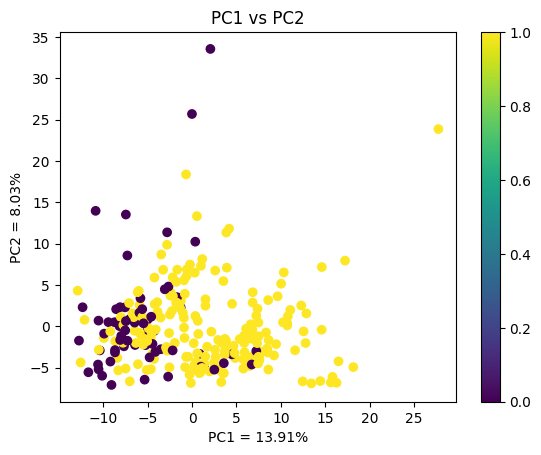

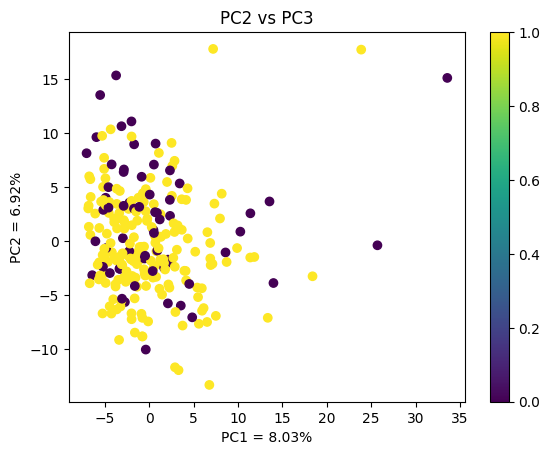

[[ 1.          0.82338667  0.69637    ...  6.2591      4.16433333
  22.9617    ]
 [ 0.          0.41563667  0.79399333 ...  7.93313333  4.94183333
   4.46723333]
 [ 1.          0.80197333  0.61996667 ...  4.77206667 11.8481
   5.55236667]
 ...
 [ 1.          0.81985667  0.7888     ... 11.88563333 14.30376667
  11.81996667]
 [ 0.          0.60053     0.56901    ...  3.42123333  5.72653333
  13.4677    ]
 [ 0.          0.84491667  0.74565333 ...  2.51466667  2.93646667
   3.9694    ]]
True


,id,gender,PPE,DFA,RPDE,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,ddpJitter,apq5Shimmer,...,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.823387,0.696370,0.567250,234.333333,0.008220,0.000073,0.001760,0.045560,...,1.591700,1.546500,1.561733,2.862000,12.293333,9.717500,6.259100,4.164333,22.961700,1
1,1,0,0.415637,0.793993,0.592453,211.000000,0.008884,0.001849,0.005473,0.036503,...,1.881900,7.049367,4.918567,4.827133,6.117633,8.599667,7.933133,4.941833,4.467233,1
2,2,1,0.801973,0.619967,0.520563,318.333333,0.006041,0.000104,0.000973,0.026073,...,1.590333,1.581967,41.129400,31.201933,14.584467,5.446800,4.772067,11.848100,5.552367,1
3,3,0,0.828707,0.626097,0.537183,492.000000,0.003913,0.000042,0.000260,0.027467,...,5.676767,2.382533,1.677633,1.908400,2.842167,3.493867,3.085267,4.032933,22.773633,1
4,4,0,0.831287,0.779397,0.726717,361.666667,0.005622,0.002023,0.003290,0.108363,...,3.614567,3.881267,4.104600,4.285233,2.953200,2.799933,2.811367,13.338833,63.766900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,0,0.751703,0.651830,0.586847,324.666667,0.005911,0.000251,0.002113,0.034777,...,1.552700,3.009767,19.298667,15.072200,13.479700,14.877933,20.532267,16.132633,40.472133,1
248,248,1,0.611750,0.688327,0.452343,355.333333,0.005410,0.000964,0.002120,0.061150,...,1.852067,1.893733,4.448533,3.180933,2.880233,2.805067,3.071367,4.962500,2.890800,1
249,249,1,0.819857,0.788800,0.373520,338.666667,0.005684,0.000042,0.000410,0.032463,...,1.635000,16.619433,90.482767,65.641367,29.098533,8.966500,11.885633,14.303767,11.819967,1
250,250,0,0.600530,0.569010,0.411987,401.000000,0.004775,0.000103,0.000360,0.016757,...,11.502200,11.243367,2.674667,2.714200,2.706000,2.637700,3.421233,5.726533,13.467700,0


[[ 4.85172806e+00 -3.82491750e+00 -3.98015792e+00 ... -7.85084560e-02
  -5.04824172e-03  3.14730228e-15]
 [ 3.85696799e+00  1.13670079e+01 -1.50187579e+00 ...  8.71725166e-03
  -8.78259910e-03  3.14730228e-15]
 [-5.60151649e+00  7.61274244e-01 -3.29128492e+00 ... -1.10804374e-02
  -2.59910244e-02  3.14730228e-15]
 ...
 [-4.54546290e+00 -7.87514284e-01 -7.08283008e+00 ...  2.17742508e-02
   7.74627653e-02  3.14730228e-15]
 [-1.05389693e+01  7.02770658e-01  9.03505692e+00 ...  5.95835808e-03
  -3.02748410e-02  3.14730228e-15]
 [-5.47259475e+00  3.76212083e-01 -2.75339036e+00 ... -2.55673956e-03
  -9.37440696e-03  3.14730228e-15]]


In [23]:
rpca = RunPCA(X, y)
rpca.run()

print(X)
print((X == old_X).all())
display(df)

X_pca = rpca.X
print(X_pca)


# NOTE: from running below alone, I learnt that X cannot have all zero columns and highly correlated columns
# X = np.random.rand(10, 6)
# # X = np.concatenate([X, np.array([0,0,0,0,0,0,0,0,0,0]).reshape(-1, 1)], axis=1)
# X = np.concatenate([X, 10*X[:, 2].reshape(-1, 1)], axis=1)
# print(X)
# H = X@np.linalg.pinv(X.T@X)@X.T
# Hii = np.diag(H)
# print(2*X.shape[1]/X.shape[0])
# print(2*Hii.mean())

In PC1 vs PC2 we can see a separation of the classes, which is hopeful!

============================= I will now run a UMAP embedding to check things out =============================

In [24]:
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings = reducer.fit_transform(X)  # run UMAP on the original X, not the X_pca
# embeddings = reducer.fit_transform(X_pca)

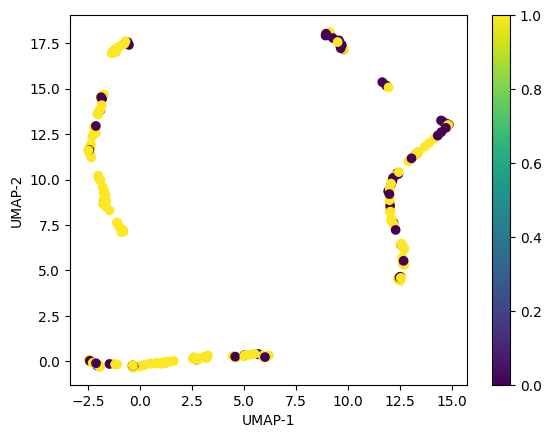

In [25]:
plt.figure()
plt.scatter(embeddings[:, 0],embeddings[:, 1], c=y)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar()
plt.show()
plt.close()

============================= I will now find and remove some outliers =============================

I will remove outliers based on high "leverage" - which is the deviation of the sample in the feature space compared to the general clustering of the samples. They can be calculated via $H_{ii} = [X(X^TX)^{-1}X^T]_{ii}$ for the i-th sample, and "high" happens for $H_{ii} > 2\bar{H_{ii}} = 2p/n$.

"leverage" $H_{ii} = [X(X^TX)^{-1}X^T]_{ii}$,          $H_{ii} > 2\bar{H_{ii}} = 2p/n^*$

In [26]:
X = X_pca.copy()

print(X)
print(X.shape)
H = X@np.linalg.pinv(X.T@X)@X.T
print(H.shape)
Hii = np.diag(H)
print(len(Hii))

[[ 4.85172806e+00 -3.82491750e+00 -3.98015792e+00 ... -7.85084560e-02
  -5.04824172e-03  3.14730228e-15]
 [ 3.85696799e+00  1.13670079e+01 -1.50187579e+00 ...  8.71725166e-03
  -8.78259910e-03  3.14730228e-15]
 [-5.60151649e+00  7.61274244e-01 -3.29128492e+00 ... -1.10804374e-02
  -2.59910244e-02  3.14730228e-15]
 ...
 [-4.54546290e+00 -7.87514284e-01 -7.08283008e+00 ...  2.17742508e-02
   7.74627653e-02  3.14730228e-15]
 [-1.05389693e+01  7.02770658e-01  9.03505692e+00 ...  5.95835808e-03
  -3.02748410e-02  3.14730228e-15]
 [-5.47259475e+00  3.76212083e-01 -2.75339036e+00 ... -2.55673956e-03
  -9.37440696e-03  3.14730228e-15]]
(252, 252)
(252, 252)
252


In [27]:
out_thresh_pn = 2*X.shape[1]/X.shape[0]
out_thresh_hii = 2*Hii.mean()
print(f"the threshold for high is: 2p/n = 2*{X.shape[1]}/{X.shape[0]} = {out_thresh_pn} == {out_thresh_hii} = 2*mean(H_ii)")

the threshold for high is: 2p/n = 2*252/252 = 2.0 == 1.992063492063492 = 2*mean(H_ii)


Note that in the above cell, if I don't use X_pca (ie, I note out 'X = X_pca.copy()' two cells above) and I just use the original X, then $2p/n \neq 2\bar{H_{ii}}$. I figured out that X cannot have all zero columns, and it cannot have highly correlated columns. If I remove highly correlated columns with high_corr_thresh > 0.5, then I roughly remedy things ($2p/n \approx 2\bar{H_{ii}}$). But for now, we'll just reassign via the PCA and hope that captures the outliers.

In [29]:
for ii in range(len(Hii)):
    if Hii[ii] >= 1*out_thresh_pn:
#     if Hii[ii] >= 3*out_thresh_hii:
#     if True:
        print(ii, Hii[ii])

In [30]:
# check = out_thresh_pn
check = 3*out_thresh_hii

ind = list(np.where(Hii > check)[0])
print(type(ind))
print("indices:", ind)
print("classes:", [y[ii] for ii in ind])
print(len(ind), len(ind)/len(Hii))

<class 'list'>
indices: []
classes: []
0 0.0


If there was a weird amount of hits for the condition that $H_{ii} > 2\bar{H_{ii}} = 2p/n$, then I tweaked the threashold to remove <~ 1% of the points, ie, the top 1% of the highest leverage points.

In [31]:
# remove outliers and SAVE the df

df_outrmv = df.drop(index=ind).copy()
display(df_outrmv)
df_outrmv.to_csv(data_dir + '/pd_speech_features_reduced_outrmv.csv', index=None)
y = df_outrmv['class']

,id,gender,PPE,DFA,RPDE,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,ddpJitter,apq5Shimmer,...,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.823387,0.696370,0.567250,234.333333,0.008220,0.000073,0.001760,0.045560,...,1.591700,1.546500,1.561733,2.862000,12.293333,9.717500,6.259100,4.164333,22.961700,1
1,1,0,0.415637,0.793993,0.592453,211.000000,0.008884,0.001849,0.005473,0.036503,...,1.881900,7.049367,4.918567,4.827133,6.117633,8.599667,7.933133,4.941833,4.467233,1
2,2,1,0.801973,0.619967,0.520563,318.333333,0.006041,0.000104,0.000973,0.026073,...,1.590333,1.581967,41.129400,31.201933,14.584467,5.446800,4.772067,11.848100,5.552367,1
3,3,0,0.828707,0.626097,0.537183,492.000000,0.003913,0.000042,0.000260,0.027467,...,5.676767,2.382533,1.677633,1.908400,2.842167,3.493867,3.085267,4.032933,22.773633,1
4,4,0,0.831287,0.779397,0.726717,361.666667,0.005622,0.002023,0.003290,0.108363,...,3.614567,3.881267,4.104600,4.285233,2.953200,2.799933,2.811367,13.338833,63.766900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,0,0.751703,0.651830,0.586847,324.666667,0.005911,0.000251,0.002113,0.034777,...,1.552700,3.009767,19.298667,15.072200,13.479700,14.877933,20.532267,16.132633,40.472133,1
248,248,1,0.611750,0.688327,0.452343,355.333333,0.005410,0.000964,0.002120,0.061150,...,1.852067,1.893733,4.448533,3.180933,2.880233,2.805067,3.071367,4.962500,2.890800,1
249,249,1,0.819857,0.788800,0.373520,338.666667,0.005684,0.000042,0.000410,0.032463,...,1.635000,16.619433,90.482767,65.641367,29.098533,8.966500,11.885633,14.303767,11.819967,1
250,250,0,0.600530,0.569010,0.411987,401.000000,0.004775,0.000103,0.000360,0.016757,...,11.502200,11.243367,2.674667,2.714200,2.706000,2.637700,3.421233,5.726533,13.467700,0


Now redo the PCA and UMAP to see what changed...

[[  0.           1.           0.82338667 ...   4.16433333  22.9617
    1.        ]
 [  1.           0.           0.41563667 ...   4.94183333   4.46723333
    1.        ]
 [  2.           1.           0.80197333 ...  11.8481       5.55236667
    1.        ]
 ...
 [249.           1.           0.81985667 ...  14.30376667  11.81996667
    1.        ]
 [250.           0.           0.60053    ...   5.72653333  13.4677
    0.        ]
 [251.           0.           0.84491667 ...   2.93646667   3.9694
    0.        ]]
number of components = 252


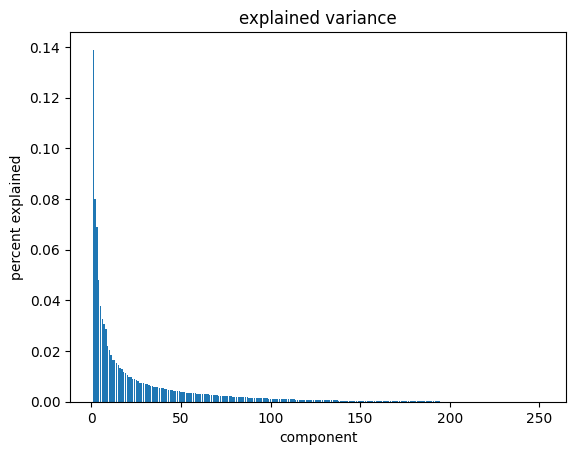

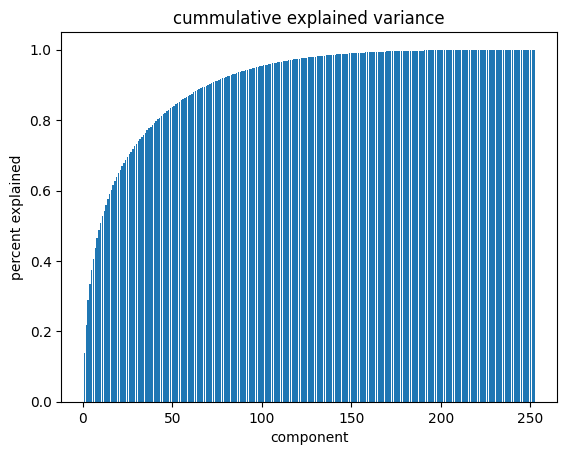

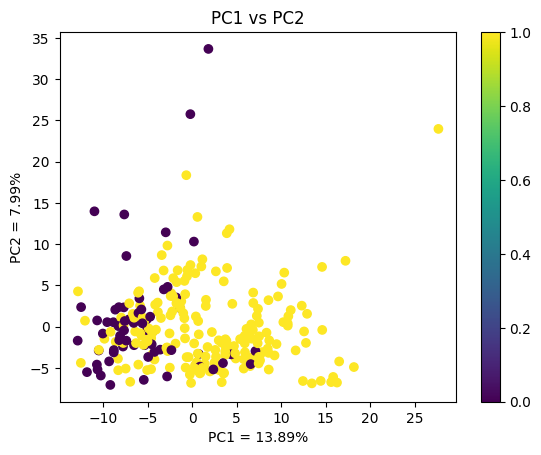

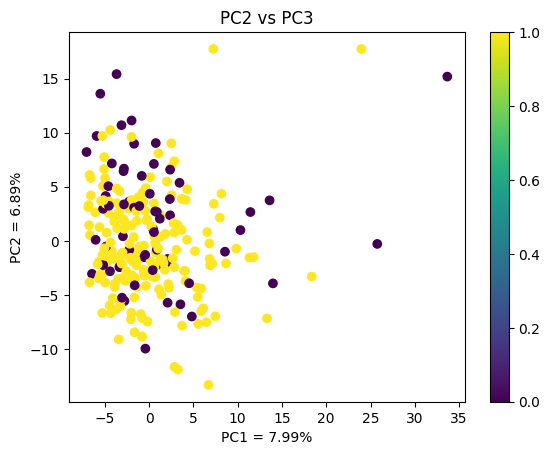

In [32]:
X = df_outrmv.values.copy()  # if you don't add .copy() changing X will change df_outrmv [objects, you see]
print(X)
rpca = RunPCA(X, y)
rpca.run()

X_pca = rpca.X

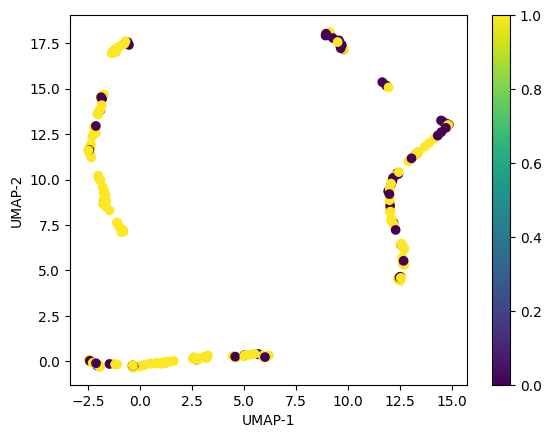

In [33]:
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings = reducer.fit_transform(X)  # run UMAP on the original X, not the X_pca
# embeddings = reducer.fit_transform(X_pca)

plt.figure()
plt.scatter(embeddings[:, 0],embeddings[:, 1], c=y)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar()
plt.show()
plt.close()

============================= I will now balance the data for the neural net =============================

In [34]:
df_HC = df_outrmv[df_outrmv['class'] == 0]
df_PD = df_outrmv[df_outrmv['class'] == 1]

print(f"original num of HC =", len(df_HC))
print(f"original num of PD =", len(df_PD))

df_balanced = pd.concat([df_outrmv, df_HC.sample(n=len(df_PD)-len(df_HC), replace=True)]).reset_index(drop=True)
display(df_balanced)

print(f"num of HC =", len(df_balanced[df_balanced['class'] == 0]))
print(f"num of PD =", len(df_balanced[df_balanced['class'] == 1]))

original num of HC = 64
original num of PD = 188


,id,gender,PPE,DFA,RPDE,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,ddpJitter,apq5Shimmer,...,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.823387,0.696370,0.567250,234.333333,0.008220,0.000073,0.001760,0.045560,...,1.591700,1.546500,1.561733,2.862000,12.293333,9.717500,6.259100,4.164333,22.961700,1
1,1,0,0.415637,0.793993,0.592453,211.000000,0.008884,0.001849,0.005473,0.036503,...,1.881900,7.049367,4.918567,4.827133,6.117633,8.599667,7.933133,4.941833,4.467233,1
2,2,1,0.801973,0.619967,0.520563,318.333333,0.006041,0.000104,0.000973,0.026073,...,1.590333,1.581967,41.129400,31.201933,14.584467,5.446800,4.772067,11.848100,5.552367,1
3,3,0,0.828707,0.626097,0.537183,492.000000,0.003913,0.000042,0.000260,0.027467,...,5.676767,2.382533,1.677633,1.908400,2.842167,3.493867,3.085267,4.032933,22.773633,1
4,4,0,0.831287,0.779397,0.726717,361.666667,0.005622,0.002023,0.003290,0.108363,...,3.614567,3.881267,4.104600,4.285233,2.953200,2.799933,2.811367,13.338833,63.766900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,173,1,0.816993,0.590523,0.485107,343.333333,0.005610,0.000048,0.000377,0.047977,...,1.742567,7.019500,6.661367,6.797900,7.258700,4.913100,2.478833,4.062433,5.462367,0
372,189,0,0.834303,0.687160,0.294950,406.666667,0.004734,0.000037,0.000360,0.031340,...,3.222667,50.354967,20.084500,5.067233,3.050800,3.202900,2.935767,3.099533,3.476433,0
373,75,0,0.597490,0.802380,0.431527,316.000000,0.006081,0.000935,0.001600,0.062293,...,1.598133,2.165500,8.089833,6.083700,5.110700,4.043133,4.045600,4.669567,3.557500,0
374,103,0,0.695677,0.705133,0.593263,318.000000,0.007010,0.000683,0.001650,0.033240,...,54.418867,36.123100,27.244533,7.919000,3.229800,3.667867,2.823633,3.133967,3.184200,0


num of HC = 188
num of PD = 188


In [35]:
# SAVE the df from above

df_balanced.to_csv(data_dir + '/pd_speech_features_reduced_outrmv_balanced.csv', index=None)

In [ ]:
# F- I-- N---